In [347]:
!pip install spacy

In [348]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------------ --------------------- 5.8/12.8 MB 32.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 33.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [349]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [350]:
#read the data 
reviews_nodevtype=pd.read_csv("steam_reviews.csv")

In [351]:
reviews_nodevtype

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment
0,Rust,252490,177409644,Rust is a great game. It is like real life if there where no rules. Everyone is very toxic if they have power but when they are starting they are crybabies. I think that its a pretty hard game to master and needs a lot of hours which most people dont have. Before playing you need to know that everything is temporary so you wont be frustrated with the game. This game is not for everyone. The game is great in its own unique way and also is perfect if you are trying to become an electrician.,rust is a great game it is like real life if there where no rules everyone is very toxic if they have power but when they are starting they are crybabies i think that its a pretty hard game to master and needs a lot of hours which most people dont have before playing you need to know that everything is temporary so you wont be frustrated with the game this game is not for everyone the game is great in its own unique way and also is perfect if you are trying to become an electrician,NEU
1,Rust,252490,177619447,"This game makes me want to kill myself. It's so addicting I low key cant hop off the game even when I try. I can literally play for 10+ hours at a time if I felt like it easily. Please do NOT get this fucking game. It is full of Nazis, Russians, racism and loud little kids screaming at you for your 14 wood you just farmed. You can't get a fucking base down because of full ak kits roaming for no fucking reason. If you ever think of getting this game, I ADVISE YOU TO NOT GET IT, I REPEAT, DO NOT GET THIS GAME.",this game makes me want to kill myself its so addicting i low key cant hop off the game even when i try i can literally play for hours at a time if i felt like it easily please do not get this fucking game it is full of nazis russians racism and loud little kids screaming at you for your wood you just farmed you cant get a fucking base down because of full ak kits roaming for no fucking reason if you ever think of getting this game i advise you to not get it i repeat do not get this game,NEG
2,Rust,252490,178793028,"Great game very unique and grindy, which I personally enjoy. It's always been my #1 game, and I've been playing since the Legacy days. It's come a long way, i definitely recommend it, but just keep in mind that there's a lot to learn and figure out, so it can be frustrating for new players at first.",great game very unique and grindy which i personally enjoy its always been my game and ive been playing since the legacy days its come a long way i definitely recommend it but just keep in mind that theres a lot to learn and figure out so it can be frustrating for new players at first,POS
3,Rust,252490,177844978,"[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\n\n[b]Rating:[/b] ⭐⭐⭐⭐☆ (4/5)\n\n223 hours in Rust has taught me one thing: you either survive and thrive, or you get ambushed naked and lose everything. This game is ruthless, and honestly, that’s half the fun. Here’s my take from a player who’s crafted, built, fought, and gotten betrayed way too many times.\n\n[hr][/hr]\n\n[h2]Gameplay - Brutal, Unpredictable, and Completely Addictive[/h2]\nIn Rust, you’re constantly on your toes. You start with nothing but a rock and a torch, scavenging for resources, crafting, and upgrading your base… all while everyone else is trying to take you out. The satisfaction of going from a naked survivor to a geared warrior with a fully fortified base is a journey that’s tough but incredibly rewarding.\n\nSome classic Rust experiences:\n\nSneaking into someone’s base and “borrowing” supplies.\nLogging off after a good session… only to come back and find you’ve been raided.\nMaking allies with strangers, who may turn on you at any moment!\n[hr][/hr]\n\n[h2]Graphics & Environment - Gritty and Real[/h2]\nThe environment is unforgiving but beautifully rendered. From dense forests to wide-open plains, the scenery is as stunning as it is hostile. Watchin

the following code was written with the help of ChatGPT

In [352]:
#add type of developer to dataframe 
developers = pd.read_csv("is310-final-project-data-2.csv")

# Merge the DataFrames on 'game_title' (df2) and 'name' (df1)
merged_df = reviews_nodevtype.merge(developers[['name', 'type_of_developer', 'simplified_category']], 
                      left_on='game_title', 
                      right_on='name', 
                      how='left')

# Drop the 'name' column if not needed after the merge
merged_df = merged_df.drop(columns=['name'])

merged_df

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment,type_of_developer,simplified_category
0,Rust,252490,177409644,Rust is a great game. It is like real life if there where no rules. Everyone is very toxic if they have power but when they are starting they are crybabies. I think that its a pretty hard game to master and needs a lot of hours which most people dont have. Before playing you need to know that everything is temporary so you wont be frustrated with the game. This game is not for everyone. The game is great in its own unique way and also is perfect if you are trying to become an electrician.,rust is a great game it is like real life if there where no rules everyone is very toxic if they have power but when they are starting they are crybabies i think that its a pretty hard game to master and needs a lot of hours which most people dont have before playing you need to know that everything is temporary so you wont be frustrated with the game this game is not for everyone the game is great in its own unique way and also is perfect if you are trying to become an electrician,NEU,"['Indie', 'AA']",Multiple
1,Rust,252490,177619447,"This game makes me want to kill myself. It's so addicting I low key cant hop off the game even when I try. I can literally play for 10+ hours at a time if I felt like it easily. Please do NOT get this fucking game. It is full of Nazis, Russians, racism and loud little kids screaming at you for your 14 wood you just farmed. You can't get a fucking base down because of full ak kits roaming for no fucking reason. If you ever think of getting this game, I ADVISE YOU TO NOT GET IT, I REPEAT, DO NOT GET THIS GAME.",this game makes me want to kill myself its so addicting i low key cant hop off the game even when i try i can literally play for hours at a time if i felt like it easily please do not get this fucking game it is full of nazis russians racism and loud little kids screaming at you for your wood you just farmed you cant get a fucking base down because of full ak kits roaming for no fucking reason if you ever think of getting this game i advise you to not get it i repeat do not get this game,NEG,"['Indie', 'AA']",Multiple
2,Rust,252490,178793028,"Great game very unique and grindy, which I personally enjoy. It's always been my #1 game, and I've been playing since the Legacy days. It's come a long way, i definitely recommend it, but just keep in mind that there's a lot to learn and figure out, so it can be frustrating for new players at first.",great game very unique and grindy which i personally enjoy its always been my game and ive been playing since the legacy days its come a long way i definitely recommend it but just keep in mind that theres a lot to learn and figure out so it can be frustrating for new players at first,POS,"['Indie', 'AA']",Multiple
3,Rust,252490,177844978,"[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\n\n[b]Rating:[/b] ⭐⭐⭐⭐☆ (4/5)\n\n223 hours in Rust has taught me one thing: you either survive and thrive, or you get ambushed naked and lose everything. This game is ruthless, and honestly, that’s half the fun. Here’s my take from a player who’s crafted, built, fought, and gotten betrayed way too many times.\n\n[hr][/hr]\n\n[h2]Gameplay - Brutal, Unpredictable, and Completely Addictive[/h2]\nIn Rust, you’re constantly on your toes. You start with nothing but a rock and a torch, scavenging for resources, crafting, and upgrading your base… all while everyone else is trying to take you out. The satisfaction of going from a naked survivor to a geared warrior with a fully fortified base is a journey that’s tough but incredibly rewarding.\n\nSome classic Rust experiences:\n\nSneaking into someone’s base and “borrowing” supplies.\nLogging off after a good session… only to come back and find you’ve been raided.\nMaking allies with strangers, who may turn on you at any moment!\n[hr][/hr]\n\n[h2]Graphics & Environment - Gritty and Real[/h2]\nThe environment is unforgiving

In [353]:
#create csv
merged_df.to_csv("steam_reviews_2.csv", index=False)

In [354]:
#create new df with type of developer included
reviews=pd.read_csv("steam_reviews_2.csv")

In [355]:
reviews_mult=reviews[reviews['simplified_category']=='Multiple']

In [356]:
reviews_indie=reviews[reviews['simplified_category']=='Indie']

In [357]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(reviews['cleaned_reviews'])

In [358]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aaa,aart,abandon,abandoned,abhor,abhorrent,abilities,ability,ablaze,able,...,可以說是這麼多代fc來說,多不勝數,最大問題是ea,最差的一代,最适合玩csgo的宝宝们练枪的游戏可以和人质sama玩捆绑play后入狗爬式跟随精神控制注意,會給好評的人究竟ea,糞作,給了你多少迷湯,這麼多年仍然是用薯仔來做server,還是一生從沒打過機
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [360]:
reviews['lemmatized_reviews'] = reviews['cleaned_reviews'].apply(lemmatize)

In [361]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(reviews['lemmatized_reviews'])

In [362]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

time                  401
feel                  352
player                352
new                   301
fun                   291
                     ... 
express                 3
protagonist             3
prone                   3
extraction shooter      3
rd                      3
Length: 3849, dtype: int64

In [363]:
print(word_counts.head(10))

time         401
feel         352
player       352
new          301
fun          291
ve           264
get          240
want         240
hour         235
character    230
dtype: int64


In [364]:
#convert word counts to a percentage
word_counts = word_counts / word_counts.sum()

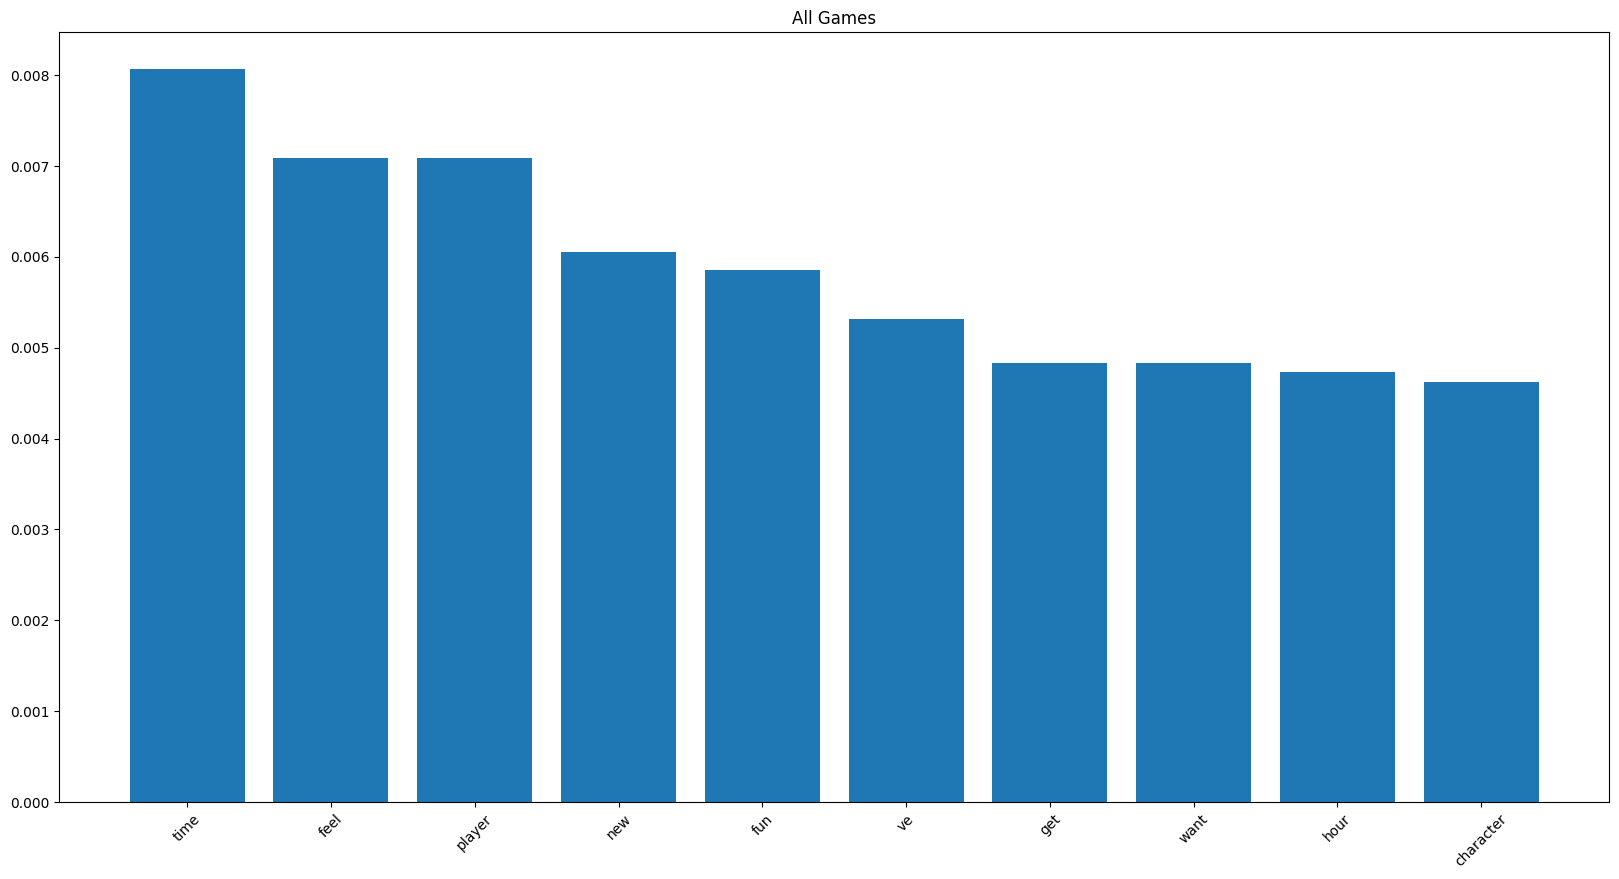

In [365]:
#plot the 10 most common words
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.title("All Games")
plt.show()

In [366]:
reviews_aaa=reviews[reviews['simplified_category']=='AAA']

In [367]:
reviews_aaa.loc[:, 'lemmatized_reviews'] = reviews_aaa['cleaned_reviews'].apply(lemmatize)

In [368]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
aaa_bag_of_words = vectorizer.fit_transform(reviews_aaa['lemmatized_reviews'])
aaa_bow_df = pd.DataFrame(aaa_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
aaa_word_counts = aaa_bow_df.sum()
aaa_word_counts = aaa_word_counts.sort_values(ascending=False)
print(aaa_word_counts.head(10))


story     79
new       59
time      57
feel      53
fun       44
get       42
ve        41
want      41
player    34
great     34
dtype: int64


In [369]:
aaa_word_counts = aaa_word_counts / aaa_word_counts.sum()

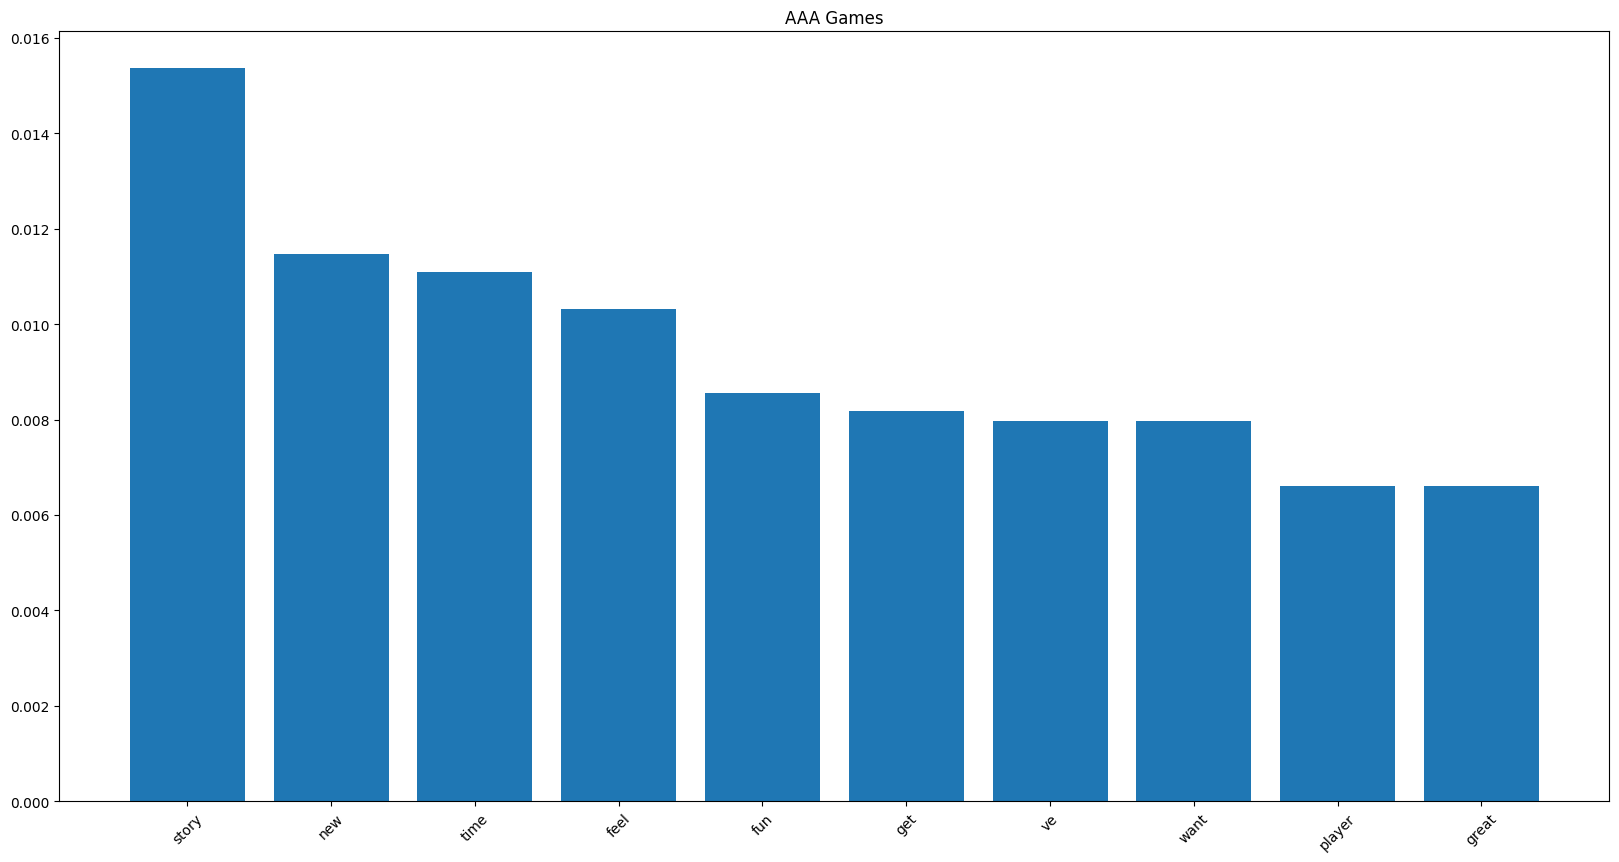

In [370]:
#plot the 10 most common words
aaa_plot_list = aaa_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(aaa_plot_list.index, aaa_plot_list.values)
plt.xticks(rotation=45)
plt.title("AAA Games")
plt.show()

In [371]:
reviews_mult=reviews[reviews['simplified_category']=='Multiple']
reviews_mult.loc[:, 'lemmatized_reviews'] = reviews_mult['cleaned_reviews'].apply(lemmatize)

In [372]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
mult_bag_of_words = vectorizer.fit_transform(reviews_mult['lemmatized_reviews'])
mult_bow_df = pd.DataFrame(mult_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
mult_word_counts = mult_bow_df.sum()
mult_word_counts = mult_word_counts.sort_values(ascending=False)
print(mult_word_counts.head(10))

like      122
good      117
time      116
player    115
fun        80
new        71
feel       65
hour       63
bad        59
ve         58
dtype: int64


In [373]:
mult_word_counts = mult_word_counts / mult_word_counts.sum()

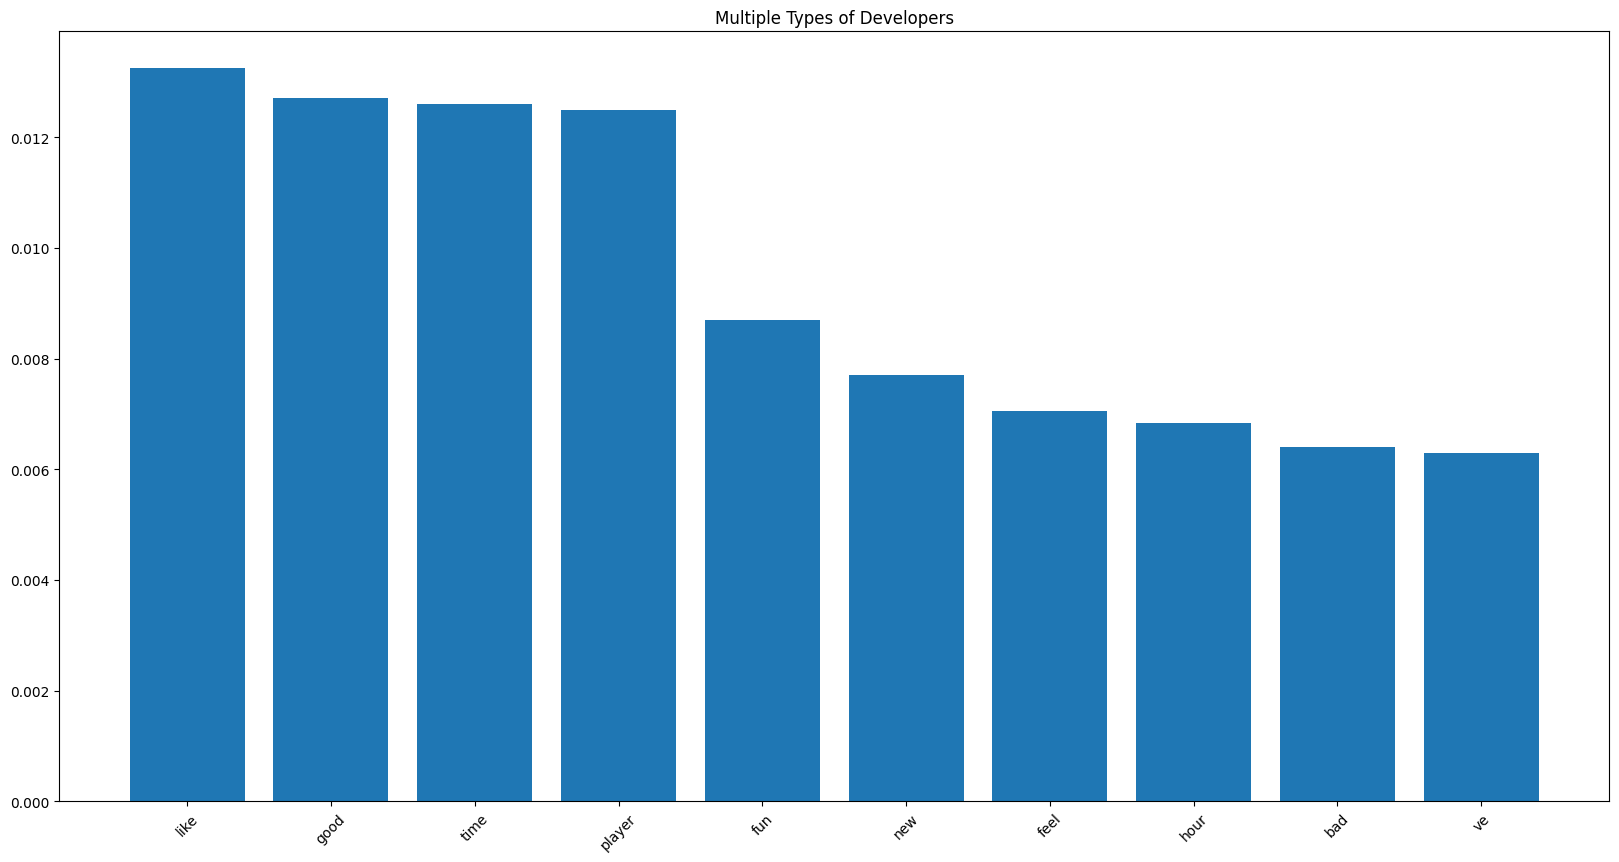

In [374]:
plot_list = mult_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.title("Multiple Types of Developers")
plt.show()

In [375]:
reviews_indie=reviews[reviews['simplified_category']=='Indie']
reviews_indie.loc[:, 'lemmatized_reviews'] = reviews_indie['cleaned_reviews'].apply(lemmatize)

In [376]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
indie_bag_of_words = vectorizer.fit_transform(reviews_indie['lemmatized_reviews'])
indie_bow_df = pd.DataFrame(indie_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
indie_word_counts = indie_bow_df.sum()
indie_word_counts = indie_word_counts.sort_values(ascending=False)
print(indie_word_counts.head(10))

time      115
fun        94
feel       90
get        77
player     75
new        72
ve         69
make       68
hour       66
thing      63
dtype: int64


In [377]:
indie_word_counts = indie_word_counts / indie_word_counts.sum()

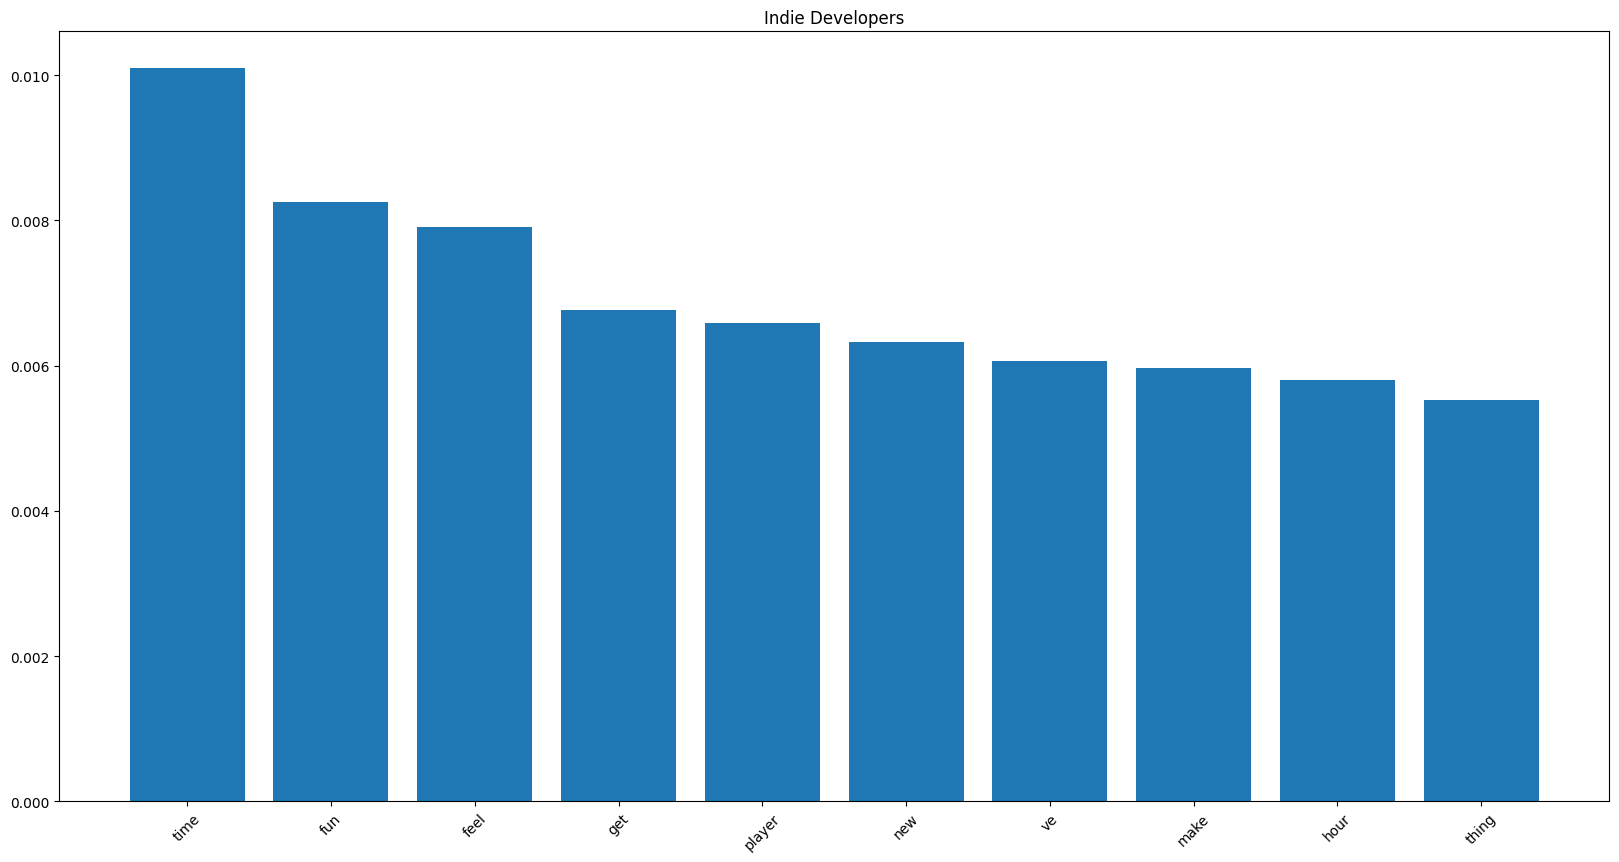

In [378]:
plot_list = indie_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.title("Indie Developers")
plt.show()

In [379]:
#train a logistic regression model using the bag of words features as X and the sentiment column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6458333333333334

In [381]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [382]:
top_10_negative

,feature,coefficient
3255,standard,-0.412824
2025,look,-0.431141
1335,game like,-0.443985
3108,shop,-0.493246
2014,lol,-0.502509
1177,free,-0.512658
2289,nice,-0.526055
96,amazing,-0.527906
2695,pretty,-0.577625
1520,good game,-0.688391


In [383]:
top_10_positive

,feature,coefficient
623,crash,0.776530
311,boring,0.771183
2654,poor,0.655286
2176,miss,0.647654
324,break,0.626118
314,bot,0.613272
457,cheater,0.610000
3612,unplayable,0.597822
3101,shit,0.596188
1126,fix,0.558625


In [384]:
from wordcloud import WordCloud

In [385]:
# this was generated with help from chatgpt
# Convert top 10 positive and negative features into dictionaries
top_positive = {row['feature']: row['coefficient'] for _, row in top_10_positive.iterrows()}
top_negative = {row['feature']: abs(row['coefficient']) for _, row in top_10_negative.iterrows()}


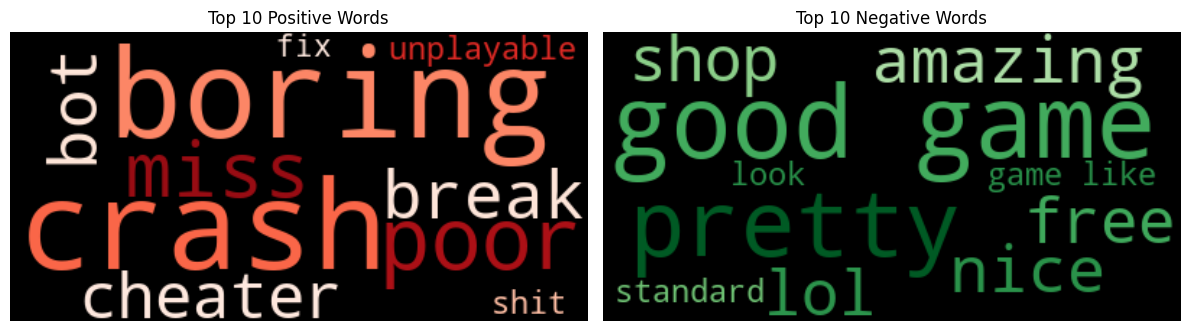

In [386]:

# Generate word clouds
wordcloud_pos = WordCloud(background_color='black', colormap='Reds').generate_from_frequencies(top_positive)
wordcloud_neg = WordCloud(background_color='black', colormap='Greens').generate_from_frequencies(top_negative)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top 10 Positive Words')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


In [387]:
#train a logistic regression model using the bag of words features as X and the simplified_category column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = reviews['simplified_category']
y = y.fillna('Unknown')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [388]:
accuracy_score(y_test, y_pred)

1.0

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.515625

In [390]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [391]:
top_10_positive

,feature,coefficient
2748,pubg,0.678724
348,bug,0.672850
2223,ms,0.641879
751,destiny,0.640276
363,bungie,0.627728
190,away,0.620936
1850,join,0.617525
119,anymore,0.610847
2228,multiplayer,0.580856
3334,stuff,0.574438


In [392]:
top_10_negative

,feature,coefficient
277,bit,-0.273650
2522,people,-0.280903
3805,worth,-0.295628
3628,use,-0.296876
2015,long,-0.304444
3040,screen,-0.314197
18,account,-0.334330
2695,pretty,-0.339360
3,able,-0.367894
2704,price,-0.418708


In [393]:
# this was generated with help from chatgpt
# Convert top 10 positive and negative features into dictionaries
top_positive = {row['feature']: row['coefficient'] for _, row in top_10_positive.iterrows()}
top_negative = {row['feature']: abs(row['coefficient']) for _, row in top_10_negative.iterrows()}

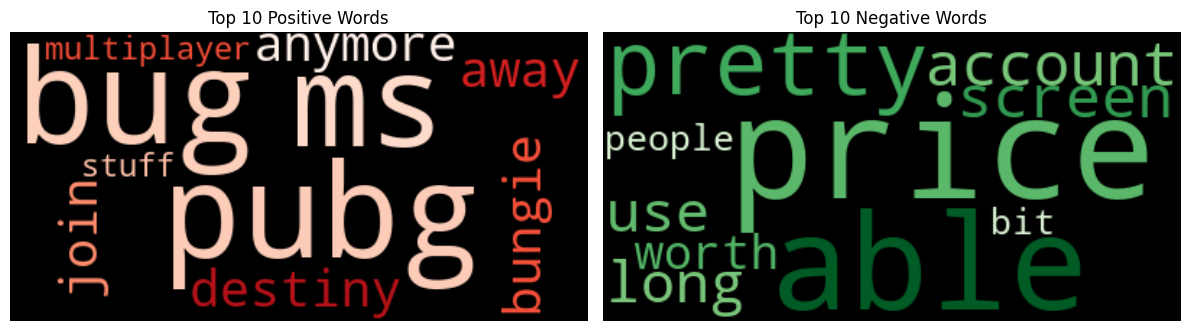

In [394]:

# Generate word clouds
wordcloud_pos = WordCloud(background_color='black', colormap='Reds').generate_from_frequencies(top_positive)
wordcloud_neg = WordCloud(background_color='black', colormap='Greens').generate_from_frequencies(top_negative)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top 10 Positive Words')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


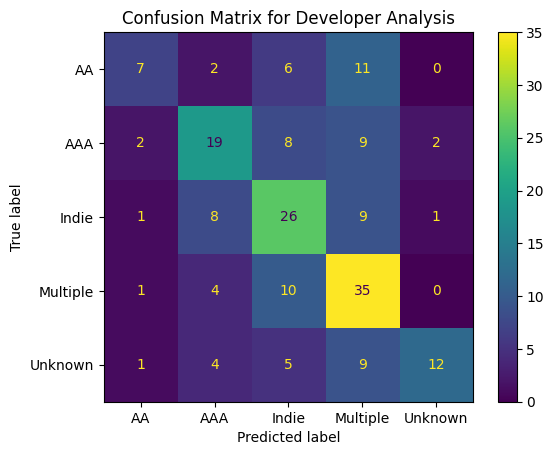

In [395]:
#chatgpt was used in writing this code 
from sklearn.metrics import ConfusionMatrixDisplay

# Dynamically infer labels from y_test
unique_classes = sorted(set(y_test))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=unique_classes,  # Automatically set labels
)
plt.title("Confusion Matrix for Developer Analysis")
plt.show()


In [396]:
!pip install gensim

In [397]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

corpus = Sparse2Corpus(bag_of_words, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [398]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)
lda_model.print_topics()

IndexError: index 3007 is out of bounds for axis 1 with size 1226

In [34]:
#check the topic distribution of a single review
lda_model.get_document_topics(corpus[30])

[(1, 0.11547084), (5, 0.85374546)]

In [35]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=reviews["review"][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

After working for so long. Rockstar and their great wisdom decided to kill linux
support. I am assuming windows is going around paying off these companies to try
and kill valve and linux. I guess rockstar just wont be getting anymore of my
money.


In [ ]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9
534,0.000650,0.000650,0.000650,0.994152,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650
45,0.001100,0.001100,0.001100,0.990104,0.001099,0.001100,0.001099,0.001099,0.001100,0.001099
576,0.001191,0.001191,0.001191,0.989280,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
448,0.001371,0.001371,0.001371,0.987665,0.001371,0.001371,0.001370,0.001371,0.001371,0.001370
864,0.001410,0.001410,0.001410,0.987314,0.001409,0.001409,0.001409,0.001409,0.001410,0.001410
...,...,...,...,...,...,...,...,...,...,...
446,0.282325,0.245215,0.464670,0.000205,0.000205,0.000205,0.000205,0.006558,0.000205,0.000205
836,0.685868,0.050444,0.000204,0.000204,0.003591,0.000204,0.153036,0.064669,0.041577,0.000204
202,0.052255,0.863617,0.000204,0.000204,0.000204,0.000204,0.000204,0.055559,0.027346,0.000204
844,0.612495,0.000513,0.000199,0.000199,0.000199,0.000199,0.000199,0.009238,0.376559,0.000199


In [37]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=reviews["review"][48]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

I usually only write Campaign reviews for my Call of Duty games but I feel
compelled to be 100% honest about Call of Duty®: Black Ops 6. I have played
every single CoD game to date, to 100% completion - Xbox, PC and PS. I have
played each zombies map and completed all Easter eggs to date also. The only CoD
game I have "passed" on is Vanguard (and for good reason).  Below I will write a
little about the zombies, multiplayer and campaign but first a quick disclaimer!
[b] This review is MY opinion, MY own personal experience and MY thoughts. I am
brutally honest when it comes to reviewing games. If you do not like my opinion,
my time or respect my personal experience, please move on. [/b]   [h1][b]
Multiplayer - All in one [/b][/h1]  The BAD aspects of MP: ⚫The Multiplayer is
no different from other CoD games. It's the same copy and pasted Multiplayer
with "omni movement" thrown in. At no point do you actually see anyone use this
mechanic but the "strafe run backwards, forwards, sideways"